In [48]:
%ls

MNIST.ipynb              t10k-images.idx3-ubyte   train-images.idx3-ubyte
requirement.txt          t10k-labels.idx1-ubyte   train-labels.idx1-ubyte


In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [50]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [51]:
len(X_train)

60000

In [52]:

len(X_test)


10000

In [53]:
X_train[0].shape


(28, 28)

In [54]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [79]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [80]:
X_test[0].ndim

2

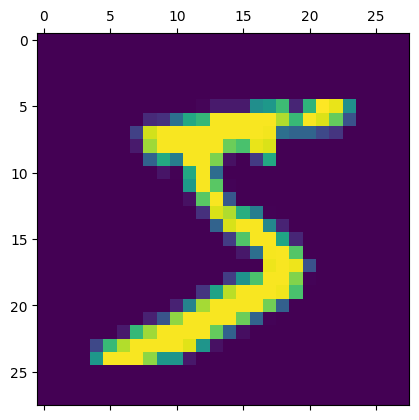

In [55]:
plt.matshow(X_train[0])

In [56]:

y_train[2]

4

In [57]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [58]:
X_train = X_train / 255
X_test = X_test / 255


In [59]:
X_train.shape

(60000, 28, 28)

In [60]:
print(X_train.ndim)

3


In [82]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [83]:
X_test_flattened.ndim

2

In [62]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

/Users/sujit/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.8113 - loss: 0.7267
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 0.9121 - loss: 0.3105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step - accuracy: 0.9180 - loss: 0.2842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.9247 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 318us/step - accuracy: 0.9258 - loss: 0.2672


In [63]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9151 - loss: 0.3042


[0.2681165933609009, 0.9265999794006348]

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step


array([2.3711124e-02, 3.7435055e-07, 5.8171332e-02, 9.5581257e-01,
       2.1281170e-03, 1.1106481e-01, 1.8478697e-06, 9.9977720e-01,
       1.0663688e-01, 6.4650929e-01], dtype=float32)

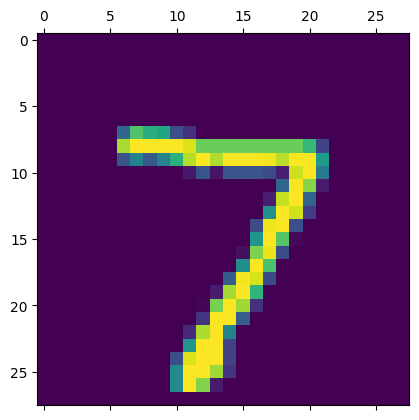

In [65]:
plt.matshow(X_test[0])

In [66]:
np.argmax(y_predicted[0])

7

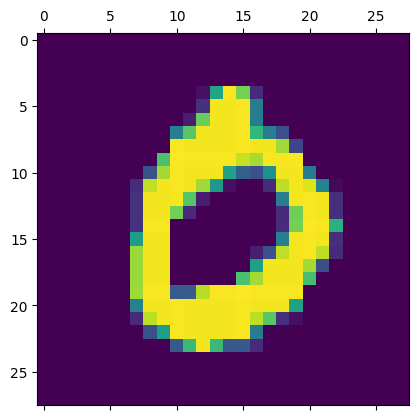

In [67]:
plt.matshow(X_test[3])

In [68]:
y_predicted = model.predict(X_test_flattened)
y_predicted[3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step


array([2.3711124e-02, 3.7435055e-07, 5.8171332e-02, 9.5581257e-01,
       2.1281170e-03, 1.1106481e-01, 1.8478697e-06, 9.9977720e-01,
       1.0663688e-01, 6.4650929e-01], dtype=float32)

In [69]:
np.argmax(y_predicted[3])

0

In [70]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [71]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [72]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   7,    9,  914,   20,    7,    4,   13,   11,   43,    4],
       [   4,    0,   13,  927,    0,   24,    2,   12,   22,    6],
       [   1,    1,    6,    2,  913,    0,   10,    4,   10,   35],
       [   9,    2,    3,   31,    7,  782,   10,    7,   35,    6],
       [  14,    3,    5,    2,    7,   19,  903,    2,    3,    0],
       [   1,    5,   22,    5,    5,    0,    0,  962,    3,   25],
       [   7,    8,    6,   19,    9,   28,    9,   13,  869,    6],
       [  11,    7,    1,    9,   25,    7,    0,   26,    7,  916]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

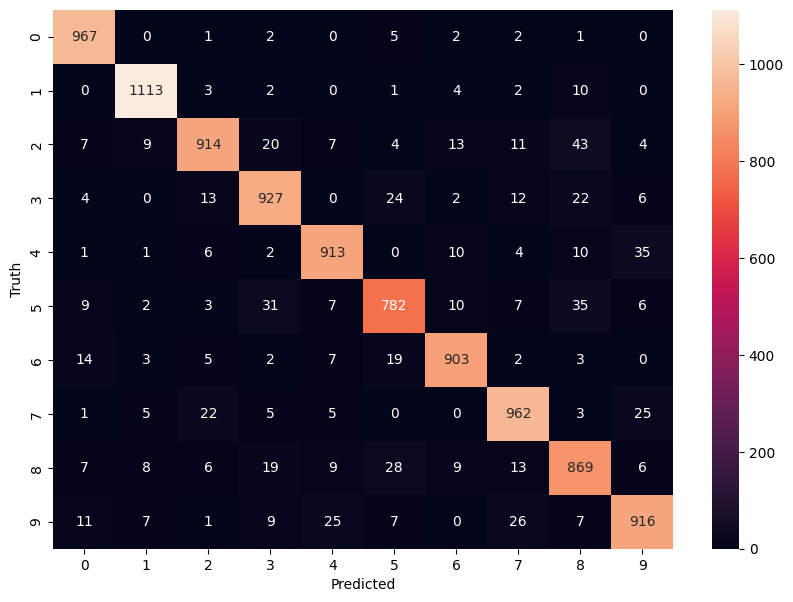

In [73]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


/Users/sujit/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - accuracy: 0.8716 - loss: 0.4492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9635 - loss: 0.1269
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9767 - loss: 0.0805
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.9815 - loss: 0.0608
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9853 - loss: 0.0480


In [75]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.9722 - loss: 0.0886


[0.0760728120803833, 0.9768000245094299]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step


Text(95.72222222222221, 0.5, 'Truth')

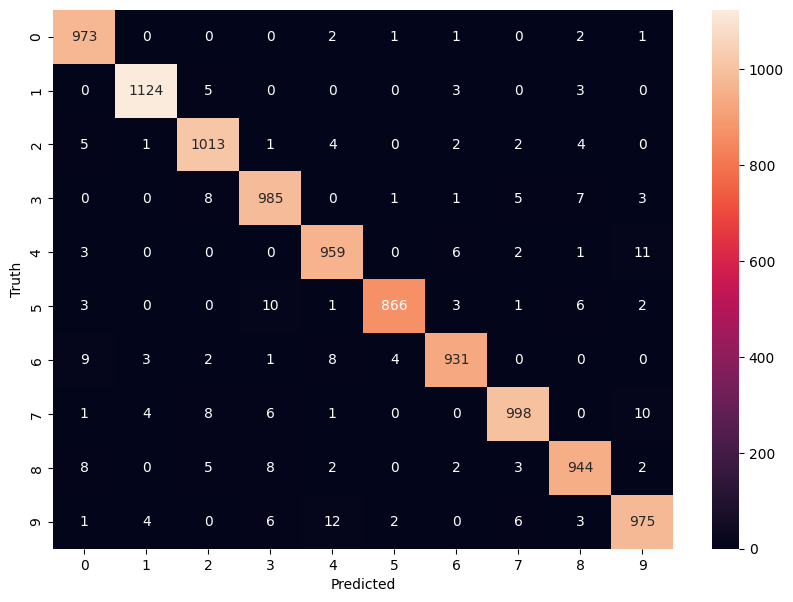

In [76]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/Users/sujit/.pyenv/versions/3.9.7/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8677 - loss: 0.4662
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9589 - loss: 0.1401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9744 - loss: 0.0888
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.9802 - loss: 0.0662
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9848 - loss: 0.0513
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.9874 - loss: 0.0430
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.9908 - loss: 0.0306
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.9916 - loss: 0.0267
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9931 - loss: 0.0228
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9945 - loss: 0.0186


In [78]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9744 - loss: 0.0927


[0.07695576548576355, 0.9793000221252441]